# TASK 1

In [1]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [2]:
df_dict={'season_2016_x':[3,3,2,2,6,6,7,7,8,7],
        'season_2017_y':[5,4,8,3,2,4,3,4,5,6]}
df= pd.DataFrame(df_dict)

In [3]:
df.values

array([[3, 5],
       [3, 4],
       [2, 8],
       [2, 3],
       [6, 2],
       [6, 4],
       [7, 3],
       [7, 4],
       [8, 5],
       [7, 6]], dtype=int64)

In [4]:
X=df.values

In [5]:
X

array([[3, 5],
       [3, 4],
       [2, 8],
       [2, 3],
       [6, 2],
       [6, 4],
       [7, 3],
       [7, 4],
       [8, 5],
       [7, 6]], dtype=int64)

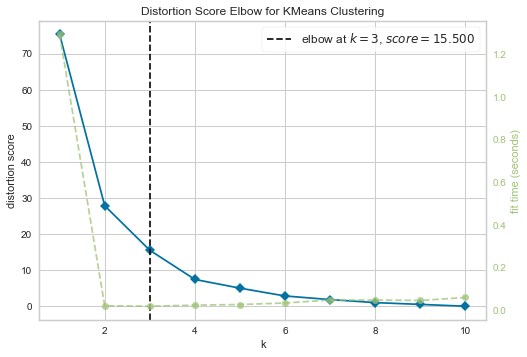

In [6]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [7]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=2, random_state=10)

# call fit method with data 
km = km_model.fit_predict(X)

# coordinates of cluster center
centroids = km_model.cluster_centers_ 

# cluster label for each data point
labels = km_model.labels_ 

In [8]:
km

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [9]:
centroids

array([[6.83333333, 4.        ],
       [2.5       , 5.        ]])

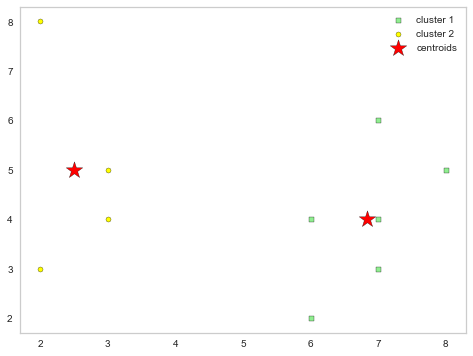

In [10]:

plt.figure(figsize=(8,6))
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plt.scatter(
#     X[km == 2, 0], X[km == 2, 1],
#     s=25, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 3'
# )

# plt.scatter(
#     X[km == 3, 0], X[km == 3, 1],
#     s=25, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 4'
# )

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [11]:
# def purity_score(y_true, y_pred):
#     # compute contingency matrix (also called confusion matrix)
#     confusion_matrix = contingency_matrix(y_true, y_pred)
#     # return purity
#     return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# # Report Purity Score
# purity = purity_score(y, labels)
# print(f"The purity score is {round(purity*100, 2)}%")

In [741]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 4, 'chi-square': 5}

In [740]:
def kmeans_center_dist(data, initial_centers, dist_type='manhattan'):
    # initial_centers = random_center_initializer(X, 2, random_state=5).initialize()
    distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                        'canberra': 5, 'chi-square': 6}

    # instance created for respective distance metric
    instanceKm = kmeans(data, initial_centers=initial_centers, metric=distance_metric(distance_measures[dist_type]))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # function purity score is defined in previous section
    return ({'clusters':pyClusters,'centers':pyCenters})


In [742]:
instanceKm.

In [14]:
X

array([[3, 5],
       [3, 4],
       [2, 8],
       [2, 3],
       [6, 2],
       [6, 4],
       [7, 3],
       [7, 4],
       [8, 5],
       [7, 6]], dtype=int64)

In [16]:
ic =np.array([[6, 4], [5, 4]])
kmeans_center_dist(data=X ,initial_centers=ic,dist_type='manhattan' )

{'clusters': [[4, 5, 6, 7, 8, 9], [0, 1, 2, 3]],
 'centers': [[6.833333333333333, 4.0], [2.5, 5.0]]}

In [19]:
ic =np.array([[6, 4], [5, 4]])
kmeans_center_dist(data=X,initial_centers=ic,dist_type='euclidean' )

{'clusters': [[4, 5, 6, 7, 8, 9], [0, 1, 2, 3]],
 'centers': [[6.833333333333333, 4.0], [2.5, 5.0]]}

In [20]:
ic =np.array([[3, 3], [8, 3]])
kmeans_center_dist(data=X,initial_centers=ic,dist_type='manhattan' )

{'clusters': [[0, 1, 2, 3], [4, 5, 6, 7, 8, 9]],
 'centers': [[2.5, 5.0], [6.833333333333333, 4.0]]}

In [21]:
ic =np.array([[3, 2], [4, 8]])
kmeans_center_dist(data=X,initial_centers=ic,dist_type='manhattan' )

{'clusters': [[0, 1, 3, 4, 5, 6, 7], [2, 8, 9]],
 'centers': [[4.857142857142857, 3.5714285714285716],
  [5.666666666666667, 6.333333333333333]]}

# TASK 2

In [571]:
data = pd.read_csv('data.csv')

In [726]:
label = pd.read_csv('label.csv')

In [727]:
data.shape

(9999, 784)

In [728]:
label.shape

(9999, 1)

In [634]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_std = scaler.transform(data)
x=data_std.copy()

In [933]:
import numpy as np
from scipy.spatial.distance import cdist 
import statistics as st

def scratch_kmeans(x,k, dist_type = 'euclidean'):
    np.random.seed(71)
    rnd = np.random.choice(len(x), k, replace=False)
    centers = x[rnd, :]
     
    dist = cdist(x, centers ,dist_type) 
    clusts = np.array([np.argmin(i) for i in dist]) 

    c=0
    while c<300:
        new_centers = []
        
        for j in range(k):
            temp_cent = x[clusts==j].mean(axis=0) 
            new_centers.append(temp_cent)
        
        new_centers = np.vstack(new_centers) 
        dist = cdist(x, new_centers ,dist_type)
        new_clusts = np.array([np.argmin(i) for i in dist])
        if (new_clusts==clusts).sum()==x.shape[0]:             
            sse_list = []
            for i in range(k):
                sse_list.append(((cdist(x[new_clusts==i],new_centers, 'euclidean')[:,i])**2).sum())
            return {'clusters':new_clusts,'centers':new_centers,'sse':np.sum(sse_list),'number_of_itterations':c}
            break
        clusts = new_clusts.copy()
        c=c+1
    sse_list = []
    for i in range(k):
        sse_list.append(((cdist(x[new_clusts==i],new_centers, 'euclidean')[:,i])**2).sum())
    return {'clusters':new_clusts,'centers':new_centers,'sse':np.sum(sse_list),'number_of_itterations':c}

In [934]:
def scratch_kmeans_majority_vote(x,k, dist_type = 'euclidean'):
    np.random.seed(71)
    rnd = np.random.choice(len(x), k, replace=False)
    centers = x[rnd, :]
     
    dist = cdist(x, centers ,dist_type) 
    clusts = np.array([np.argmin(i) for i in dist]) 
    cluster_hist = []
    
    c=0
    while c<300:
        new_centers = []
        
        for j in range(k):
            temp_cent = x[clusts==j].mean(axis=0) 
            new_centers.append(temp_cent)
        
        new_centers = np.vstack(new_centers)
        dist = cdist(x, new_centers ,dist_type)
        
        cluster_hist.append(clusts)
        
        new_clusts = np.array([np.argmin(i) for i in dist])
        if (new_clusts==clusts).sum()==x.shape[0]:             
            sse_list = []
            for i in range(k):
                sse_list.append(((cdist(x[new_clusts==i],new_centers, 'euclidean')[:,i])**2).sum())
            return {'clusters':new_clusts,
                    'centers':new_centers,
                    'sse':np.sum(sse_list),
                    'clust_history':cluster_hist,
                    'number_of_itterations':c}
            break
        clusts = new_clusts.copy()
        c=c+1
    sse_list = []
    for i in range(k):
        sse_list.append(((cdist(x[new_clusts==i],new_centers, 'euclidean')[:,i])**2).sum())
    return {'clusters':new_clusts,
            'centers':new_centers,
            'sse':np.sum(sse_list),
            'clust_history':cluster_hist,
            'number_of_itterations':c}

In [935]:
import numpy as np
from scipy.spatial.distance import cdist 
import statistics as st

def scratch_kmeans_sse_didnt_improve(x,k, dist_type = 'euclidean'):
    np.random.seed(71)
    rnd = np.random.choice(len(x), k, replace=False)
    centers = x[rnd, :]
     
    dist = cdist(x, centers ,dist_type) 
    clusts = np.array([np.argmin(i) for i in dist]) 
    sse_list=[]
    for i in range(k):
        sse_list.append(((cdist(x[clusts==i],centers, 'euclidean')[:,i])**2).sum())
    sse = np.sum(sse_list)
    print(sse)
    c=0
    while c<300:
        new_centers = []
        sse_list=[]

        
        for j in range(k):
            temp_cent = x[clusts==j].mean(axis=0) 
            new_centers.append(temp_cent)
        
        new_centers = np.vstack(new_centers) 
        dist = cdist(x, new_centers ,dist_type)
        new_clusts = np.array([np.argmin(i) for i in dist])
        for i in range(k):
            sse_list.append(((cdist(x[new_clusts==i],new_centers, 'euclidean')[:,i])**2).sum())
        new_sse = np.sum(sse_list)
        if (new_sse>=sse):             
            return {'clusters':new_clusts,'centers':new_centers,'sse':sse,'number_of_itterations':c}
            break
        sse = new_sse.copy()
        print(sse)
        clusts = new_clusts.copy()
        c=c+1
    return {'clusters':new_clusts,'centers':new_centers,'sse':sse,'number_of_itterations':c}

In [936]:
import numpy as np
from scipy.spatial.distance import cdist 
import statistics as st

def scratch_kmeans_centers_didnt_change(x,k, dist_type = 'euclidean'):
    np.random.seed(71)
    rnd = np.random.choice(len(x), k, replace=False)
    centers = x[rnd, :]
     
    dist = cdist(x, centers ,dist_type) 
    clusts = np.array([np.argmin(i) for i in dist]) 

    c=0
    while c<300:
        new_centers = []
        
        for j in range(k):
            temp_cent = x[clusts==j].mean(axis=0) 
            new_centers.append(temp_cent)
        
        new_centers = np.vstack(new_centers) 
        dist = cdist(x, new_centers ,dist_type)
        new_clusts = np.array([np.argmin(i) for i in dist])
        print((centers==new_centers).sum())
        if (centers==new_centers).sum()==centers.shape[0]*centers.shape[1]:             
            sse_list = []
            for i in range(k):
                sse_list.append(((cdist(x[new_clusts==i],new_centers, 'euclidean')[:,i])**2).sum())
            return {'clusters':new_clusts,'centers':new_centers,'sse':np.sum(sse_list),'number_of_itterations':c}
            break
        clusts = new_clusts.copy()
        centers = new_centers.copy()
        c=c+1
    sse_list = []
    for i in range(k):
        sse_list.append(((cdist(x[new_clusts==i],new_centers, 'euclidean')[:,i])**2).sum())
    return {'clusters':new_clusts,'centers':new_centers,'sse':np.sum(sse_list),'number_of_itterations':c}

In [937]:
import numpy as np
from scipy.spatial.distance import cdist 
import statistics as st

def scratch_kmeans_max_itr_met(x,k, dist_type = 'euclidean'):
    np.random.seed(71)
    rnd = np.random.choice(len(x), k, replace=False)
    centers = x[rnd, :]
     
    dist = cdist(x, centers ,dist_type) 
    clusts = np.array([np.argmin(i) for i in dist]) 

    c=0
    while c<300:
        new_centers = []
        
        for j in range(k):
            temp_cent = x[clusts==j].mean(axis=0) 
            new_centers.append(temp_cent)
        
        new_centers = np.vstack(new_centers) 
        dist = cdist(x, new_centers ,dist_type)
        new_clusts = np.array([np.argmin(i) for i in dist])
#         if (new_clusts==clusts).sum()==x.shape[0]:             
#             sse_list = []
#             for i in range(k):
#                 sse_list.append(((cdist(x[new_clusts==i],new_centers, 'euclidean')[:,i])**2).sum())
#             return {'clusters':new_clusts,'centers':new_centers,'sse':np.sum(sse_list),'number_of_itterations':c}
#             break
        clusts = new_clusts.copy()
        c=c+1
    sse_list = []
    for i in range(k):
        sse_list.append(((cdist(x[new_clusts==i],new_centers, 'euclidean')[:,i])**2).sum())
    return {'clusters':new_clusts,'centers':new_centers,'sse':np.sum(sse_list),'number_of_itterations':c}

In [938]:
def calc_sse(x,clust,center,dist_type):
    sse_list = []
    for i in range(center.shape[0]):
        sse_list.append(((cdist(x[clust==i],center, dist_type)[:,i])**2).sum())
    return {'sse_for_each_cluster':sse_list, 'sse':np.sum(sse_list)}

In [939]:
result_euclidean = scratch_kmeans(x,10,'euclidean')

In [940]:
result_euclidean

{'clusters': array([7, 9, 2, ..., 1, 3, 2], dtype=int64),
 'centers': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'sse': 5600272.922682886,
 'number_of_itterations': 41}

In [941]:
result_euclidean_sse = calc_sse(x,result_euclidean['clusters'],result_euclidean['centers'],'euclidean')

In [942]:
result_euclidean_sse

{'sse_for_each_cluster': [642654.3562300593,
  517947.5574115607,
  622043.9063304861,
  1015661.9744786393,
  401857.3513375744,
  677302.4334811931,
  5512.546410112524,
  681697.3843480583,
  579435.4055876624,
  456160.00706753996],
 'sse': 5600272.922682886}

In [943]:
result_cosine = scratch_kmeans(x,10,'cosine')

In [944]:
result_cosine

{'clusters': array([0, 2, 3, ..., 8, 1, 4], dtype=int64),
 'centers': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'sse': 5612804.250784426,
 'number_of_itterations': 84}

In [945]:
result_cosine_sse = calc_sse(x,result_cosine['clusters'],result_cosine['centers'],'euclidean')

In [946]:
result_cosine_sse

{'sse_for_each_cluster': [767961.3285259556,
  630047.2180901445,
  212162.08584569185,
  610324.6928302986,
  849782.2363716091,
  871327.7627708948,
  360071.0821418737,
  670741.6880502829,
  408191.6083369416,
  232194.54782073357],
 'sse': 5612804.250784426}

In [947]:
result_jaccard = scratch_kmeans(x,10,'jaccard')

c:\users\mirbe001\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice.


In [948]:
result_jaccard

{'clusters': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'centers': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'sse': 6679331.999999999,
 'number_of_itterations': 2}

In [949]:
result_jaccard_sse = calc_sse(x,result_jaccard['clusters'],result_jaccard['centers'],'euclidean')

In [950]:
result_jaccard_sse

{'sse_for_each_cluster': [6679331.999999999,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'sse': 6679331.999999999}

In [783]:
eu_mv = scratch_kmeans_majority_vote(x,10,'euclidean')

In [853]:
eu_mv_clust = pd.DataFrame(np.array(eu_mv['clust_history'])).apply(lambda x:x.value_counts(sort=True).keys()[0], axis=0)

In [862]:
eu_mv_clust

0       7
1       9
2       2
3       8
4       9
       ..
9994    7
9995    0
9996    1
9997    3
9998    2
Length: 9999, dtype: int64

In [877]:
calc_sse(x,eu_mv_clust,eu_mv['centers'],'euclidean')

{'sse_for_each_cluster': [627194.9990207842,
  471770.72310222744,
  642035.9154584601,
  1022953.7172877154,
  413832.98470923794,
  664597.7724877432,
  5512.546410112524,
  703468.9157921532,
  595904.7931722387,
  459064.74966142874],
 'sse': 5606337.117102101}

In [865]:
cos_mv = scratch_kmeans_majority_vote(x,10,'cosine')

In [866]:
cos_mv_clust = pd.DataFrame(np.array(cos_mv['clust_history'])).apply(lambda x:x.value_counts(sort=True).keys()[0], axis=0)

In [873]:
cos_mv_clust

0       0
1       2
2       3
3       6
4       2
       ..
9994    0
9995    0
9996    8
9997    1
9998    4
Length: 9999, dtype: int64

In [876]:
calc_sse(x,cos_mv_clust,cos_mv['centers'],'euclidean')

{'sse_for_each_cluster': [762084.8554794186,
  698516.1138714605,
  209342.6216446258,
  619929.2380070854,
  868793.1586433374,
  828580.6187792763,
  399002.6875346275,
  636251.6074808283,
  378052.5720059023,
  249331.4775198089],
 'sse': 5649884.950966371}

In [869]:
jac_mv = scratch_kmeans_majority_vote(x,10,'jaccard')

c:\users\mirbe001\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app


In [870]:
jac_mv_clust = pd.DataFrame(np.array(jac_mv['clust_history'])).apply(lambda x:x.value_counts(sort=True).keys()[0], axis=0)

In [874]:
jac_mv_clust

0       2
1       0
2       2
3       0
4       0
       ..
9994    0
9995    7
9996    0
9997    2
9998    2
Length: 9999, dtype: int64

In [875]:
calc_sse(x,jac_mv_clust,jac_mv['centers'],'euclidean')

{'sse_for_each_cluster': [3218001.338111573,
  0.0,
  nan,
  nan,
  nan,
  0.0,
  nan,
  nan,
  0.0,
  0.0],
 'sse': nan}

In [902]:
scratch_kmeans_sse_didnt_improve(x,k=10,dist_type='euclidean')

8310573.310068323
6001850.336234172
5823390.347705797
5754776.319254045
5711878.319719861
5681959.112392658
5664384.412367083
5652181.395125035
5642718.284203483
5635212.773510501
5626830.113216998
5620433.590114145
5616117.3972037705
5612933.7682819115
5610320.538375745
5608400.421308304
5606846.27135343
5605815.900078609
5604926.696714255
5603940.461959126
5603014.075937185
5602233.3604096845
5601770.599843471
5601479.946202682
5601360.002831337
5601197.228735725
5601036.182623677
5600873.198275016
5600753.286358589
5600682.083208389
5600634.003323755
5600587.461254329
5600500.354793535
5600451.087643511
5600415.557955654
5600398.714258063
5600376.394046761
5600347.370530827
5600324.604272294
5600299.556646359
5600295.749979906
5600279.483281099
5600272.922682886


{'clusters': array([7, 9, 2, ..., 1, 3, 2], dtype=int64),
 'centers': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'sse': 5600272.922682886,
 'number_of_itterations': 42}

In [903]:
scratch_kmeans_sse_didnt_improve(x,k=10,dist_type='cosine')

9990278.550957993
5898961.368749284
5810413.199095552
5746483.648244048
5702197.114329692
5685774.777621889
5678539.20355516
5673593.795992503
5670260.380027492
5668210.245655293
5666990.102715526
5666084.536141517
5663979.087955812
5659807.62775172
5653753.059024833
5647434.226840289
5642126.846977288
5637727.507283351
5636157.882306651
5634383.936705615
5633126.807019489
5631678.836250784
5631041.714254139
5629800.591900677
5628801.848865449
5627732.782797521
5627018.799858713
5626097.355117523
5624887.939689903
5623923.80091178
5623048.811065835
5622447.534976704
5621615.457137063
5620809.212147438
5619857.130020116
5618636.860759745
5617796.106068675
5617363.307172996
5616801.961489484
5616203.98450534
5615384.349034112
5615202.739386298
5614682.680771612
5614384.902701998
5614235.0691237515
5614059.193928113
5613850.440390304
5613665.057162178
5613129.639728338
5612812.531342654
5612291.816535641
5611811.4646745585
5611687.190334842
5611523.512951607
5611334.236629404


{'clusters': array([0, 2, 3, ..., 8, 1, 4], dtype=int64),
 'centers': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'sse': 5611334.236629404,
 'number_of_itterations': 54}

In [904]:
scratch_kmeans_sse_didnt_improve(x,k=10,dist_type='jaccard')

10804931.621324765
8684569.028288685


c:\users\mirbe001\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
c:\users\mirbe001\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


nan
6679331.999999999


{'clusters': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'centers': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'sse': 6679331.999999999,
 'number_of_itterations': 3}

In [918]:
scratch_kmeans_centers_didnt_change(x,k=10, dist_type='euclidean')

1628
1926
1963
1993
1983
2008
2048
2088
2211
2232
2036
2046
2167
2389
2178
2084
2194
2225
2263
2209
2249
2549
2990
3049
3130
3722
3409
3996
3712
3758
3193
3606
3655
3168
4054
3831
5197
5201
5353
6716
6616
6083
7840


{'clusters': array([7, 9, 2, ..., 1, 3, 2], dtype=int64),
 'centers': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'sse': 5600272.922682886,
 'number_of_itterations': 42}

In [919]:
scratch_kmeans_centers_didnt_change(x,k=10, dist_type='cosine')

1178
1272
1358
1408
1619
1417
1685
1512
1784
1580
1626
1681
1774
1697
1688
1566
1607
2398
1948
2036
1891
1902
1661
1850
1841
1773
1829
1803
1743
1839
1871
1782
1743
1734
1811
1792
2032
2115
2019
2013
1937
1946
2198
2358
2261
2025
2046
2066
2035
1976
2289
2152
2630
2247
2008
2658
2697
3301
4211
4166
4370
5392
4796
4513
3969
4399
2612
4094
3149
3749
3468
4514
3868
3914
2149
2858
4995
4430
5658
5341
5922
6123
6003
6816
6795
7840


{'clusters': array([0, 2, 3, ..., 8, 1, 4], dtype=int64),
 'centers': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'sse': 5612804.250784426,
 'number_of_itterations': 85}

In [922]:
scratch_kmeans_max_itr_met(x,k=10,dist_type = 'euclidean')

{'clusters': array([7, 9, 2, ..., 1, 3, 2], dtype=int64),
 'centers': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'sse': 5600272.922682886,
 'number_of_itterations': 300}

In [923]:
scratch_kmeans_max_itr_met(x,k=10,dist_type = 'cosine')

{'clusters': array([0, 2, 3, ..., 8, 1, 4], dtype=int64),
 'centers': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'sse': 5612804.250784426,
 'number_of_itterations': 300}

In [924]:
scratch_kmeans_max_itr_met(x,k=10,dist_type = 'jaccard')

c:\users\mirbe001\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice.


{'clusters': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'centers': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'sse': 6679331.999999999,
 'number_of_itterations': 300}

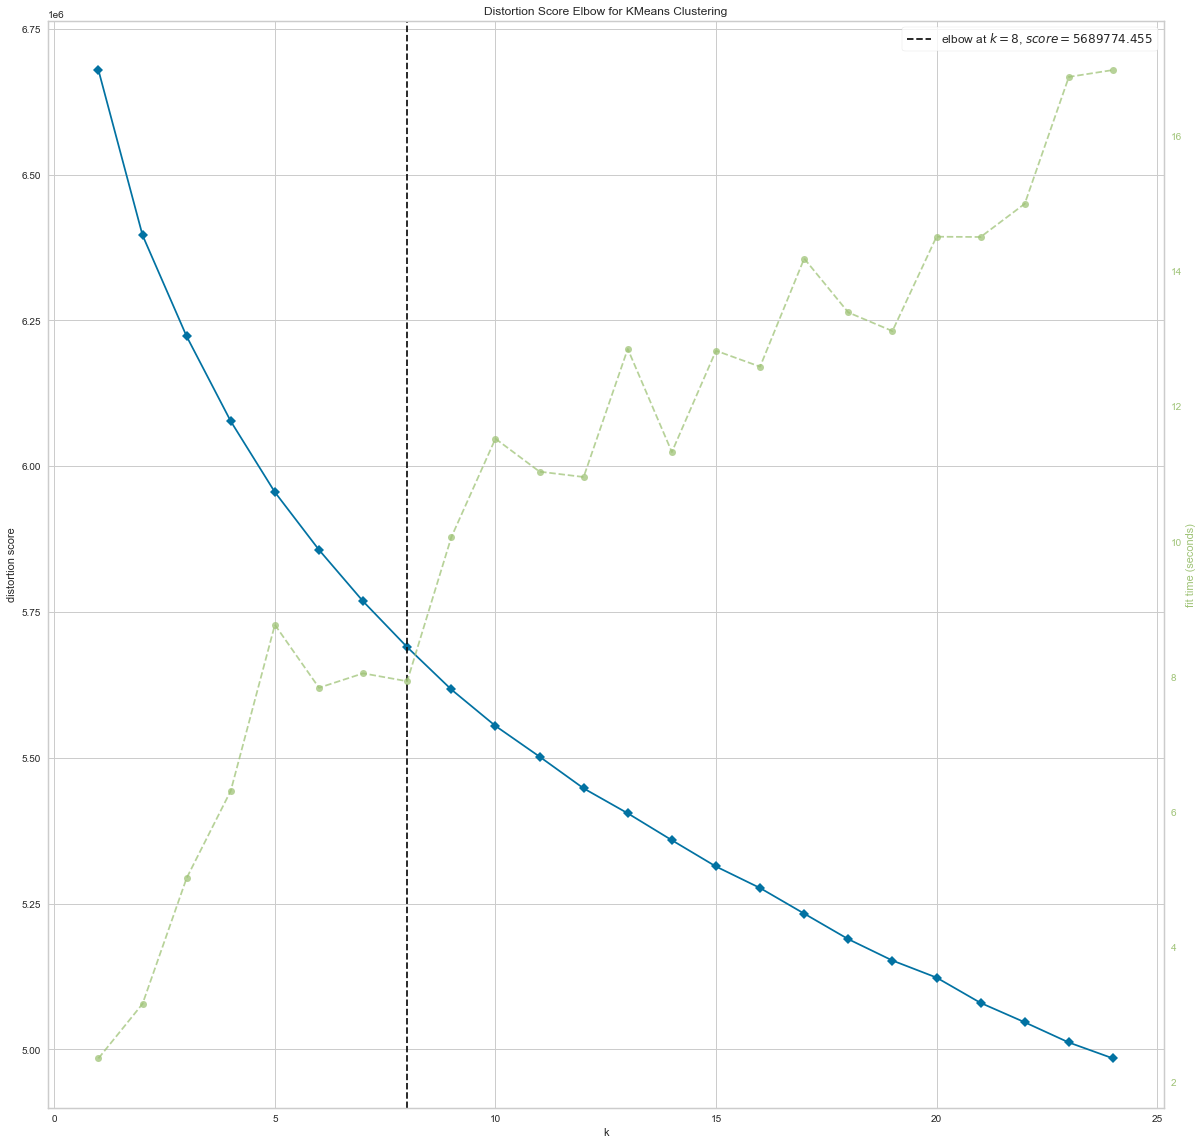

In [954]:
# Instantiate the clustering model and visualizer
plt.figure(figsize=(20,20))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 25))

visualizer.fit(x) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [754]:
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# instance created for respective distance metric
instanceKm = KMeans(n_clusters=10)
# perform cluster analysis
instanceKm.fit(x)

KMeans(n_clusters=10)

In [755]:
instanceKm.inertia_

5554849.42118726

In [953]:
# instance created for respective distance metric
instanceKm = KMeans(n_clusters=5)
# perform cluster analysis
instanceKm.fit(x)
instanceKm.inertia_

5955505.949833805

# TASK 3

In [542]:
dots = {'x':[4.7,4.9,5,4.6,5.9,6.7,6,6.2],
       'y':[3.2,3.1,3,2.9,3.2,3.1,3,2.8],
       'cluster':['red','red','red','red','blue','blue','blue','blue']}
dots_df = pd.DataFrame(dots)
dots_df

,x,y,cluster
0,4.7,3.2,red
1,4.9,3.1,red
2,5.0,3.0,red
3,4.6,2.9,red
4,5.9,3.2,blue
5,6.7,3.1,blue
6,6.0,3.0,blue
7,6.2,2.8,blue


In [543]:
vs = []
for i in range(8):
    for j in range(i+1,8):
        print(i,j)
        vs.append(cdist(dots_df.loc[[i,j],['x','y']].values, dots_df.loc[[i,j],['x','y']].values,'euclidean'))
        print(cdist(dots_df.loc[[i,j],['x','y']].values, dots_df.loc[[i,j],['x','y']].values,'euclidean'))

0 1
[[0.        0.2236068]
 [0.2236068 0.       ]]
0 2
[[0.         0.36055513]
 [0.36055513 0.        ]]
0 3
[[0.         0.31622777]
 [0.31622777 0.        ]]
0 4
[[0.  1.2]
 [1.2 0. ]]
0 5
[[0.         2.00249844]
 [2.00249844 0.        ]]
0 6
[[0.         1.31529464]
 [1.31529464 0.        ]]
0 7
[[0.         1.55241747]
 [1.55241747 0.        ]]
1 2
[[0.         0.14142136]
 [0.14142136 0.        ]]
1 3
[[0.         0.36055513]
 [0.36055513 0.        ]]
1 4
[[0.         1.00498756]
 [1.00498756 0.        ]]
1 5
[[0.  1.8]
 [1.8 0. ]]
1 6
[[0.        1.1045361]
 [1.1045361 0.       ]]
1 7
[[0.         1.33416641]
 [1.33416641 0.        ]]
2 3
[[0.         0.41231056]
 [0.41231056 0.        ]]
2 4
[[0.         0.92195445]
 [0.92195445 0.        ]]
2 5
[[0.         1.70293864]
 [1.70293864 0.        ]]
2 6
[[0. 1.]
 [1. 0.]]
2 7
[[0.         1.21655251]
 [1.21655251 0.        ]]
3 4
[[0.         1.33416641]
 [1.33416641 0.        ]]
3 5
[[0.         2.10950231]
 [2.10950231 0.       

In [544]:
np.vstack(vs)[:,0][np.vstack(vs)[:,0]>0]

array([0.2236068 , 0.36055513, 0.31622777, 1.2       , 2.00249844,
       1.31529464, 1.55241747, 0.14142136, 0.36055513, 1.00498756,
       1.8       , 1.1045361 , 1.33416641, 0.41231056, 0.92195445,
       1.70293864, 1.        , 1.21655251, 1.33416641, 2.10950231,
       1.40356688, 1.60312195, 0.80622577, 0.2236068 , 0.5       ,
       0.70710678, 0.58309519, 0.28284271])

In [545]:
np.mean(np.vstack(vs)[:,0][np.vstack(vs)[:,0]>0])

0.9829734914720503